# Instructions

Today you're going to practice working in Pandas. 


You'll walk through instantiating a `DataFrame`, reading data into it, looking at and examining that data, and then playing with it. 



We'll be using the data in the `data` folder located within this directory (it's the same wine data that we looked at during lecture). 


Typically, we use IPython notebooks like this for a very specific set of things - presentations and EDA. 


Today, as we'll be playing around with `Pandas`, much of what we'll be doing is considered EDA. Therefore, by using a notebook, we'll get a tighter feedback loop with our work than we would trying to write a script. But, in general, **we do not use IPython notebooks for development**. 

Below, we've put a set of questions and then a cell for you to work on answers. However, feel free to add additional cells if you'd like. Often it will make sense to use more than one cell for your answers. 

# Assignment Questions 

### Part 1 - The Basics of DataFrames

Let's start off by following the general workflow that we use when moving data into a DataFrame: 

    * Importing Pandas
    * Reading data into the DataFrame
    * Getting a general sense of the data

So, in terms of what you should do for this part...

1. Import pandas
2. Read the wine data into a DataFrame. 
3. Use the `attributes` and `methods` available on DataFrames to answer the following questions: 
    * How many rows and columns are in the DataFrame?
    * What data type is in each column?
    * Are all of the variables continuous, or are any categorical? qualitiy is categorical
    * How many non-null values are in each column? all
    * What are the min, mean, max, median for all numeric columns?

In [69]:
import pandas as pd
df = pd.DataFrame()
dfr = pd.read_csv('data/winequality-red.csv', delimiter = ';')
dfw = pd.read_csv('data/winequality-white.csv', delimiter = ';')
print(dfr.columns)
print(dfr.shape)
print(dfw.columns)
print(dfw.shape)
print()
print(dfr.info())
print(dfw.info())
print(dfr.head())
print(dfr.describe())
print(dfw.describe())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(4898, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulp

### Part 2 - Practice with Grabbing Data

Let's now get some practice with grabbing certain parts of the data. If you'd like some extra practice, try answering each of the questions in more than one way (because remember, we can often grab our data in a couple of different ways). 

1. Grab the first 10 rows of the `chlorides` column. 
2. Grab the last 10 rows of the `chlorides` column. 
3. Grab indices 264-282 of the `chlorides` **and** `density` columns. 
4. Grab all rows where the `chlorides` value is less than 0.10. 
5. Now grab all the rows where the `chlorides` value is greater than the column's mean (try **not** to use a hard-coded value for the mean, but instead a method).
6. Grab all those rows where the `pH` is greater than 3.0 and less than 3.5. 
7. Further filter the results from 6 to grab only those rows that have a `residual sugar` less than 2.0. 

In [72]:
print(dfw['chlorides'].head(10))
print(dfw['chlorides'].tail(10))
print(dfw.loc[264:282, ['chlorides']])
print(dfw.query('chlorides < 0.1'))
lim = dfw['chlorides'].mean()
print(lim)
print(dfw.query('chlorides > ' + str(lim)))
print(dfw.query( '3.5 > pH > 3.0'))
cols = dfw.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
dfw.columns = cols
print(dfw.query( '3.5 > pH > 3.0' and 'residual_sugar < 2.0'))

0    0.045
1    0.049
2    0.050
3    0.058
4    0.058
5    0.050
6    0.045
7    0.045
8    0.049
9    0.044
Name: chlorides, dtype: float64
4888    0.052
4889    0.030
4890    0.036
4891    0.038
4892    0.032
4893    0.039
4894    0.047
4895    0.041
4896    0.022
4897    0.020
Name: chlorides, dtype: float64
     chlorides
264      0.038
265      0.043
266      0.053
267      0.043
268      0.044
269      0.045
270      0.053
271      0.044
272      0.051
273      0.057
274      0.046
275      0.046
276      0.044
277      0.042
278      0.044
279      0.036
280      0.034
281      0.039
282      0.047
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            

### Part 3 - More Practice

Let's move on to some more complicated things. Use your knowledge of `groupby`s, `sorting`, and the other things that you learned in lecture to answer the following. 

1. Get the average amount of `chlorides` for each `quality` value. 
2. For observations with a `pH` greater than 3.0 and less than 4.0, find the average `alcohol` value by `pH`. 
3. For observations with an `alcohol` value between 9.25 and 9.5, find the highest amount of `residual sugar`. 
4. Create a new column, called `total_acidity`, that is the sum of `fixed acidity` and `volatile acidity`. 
5. Find the average `total_acidity` for each of the `quality` values. 
6. Find the top 5 `density` values. 
7. Find the 10 lowest `sulphates` values. 

In [87]:
#dfw.columns
groupbyquality = dfw.groupby('quality')
print(groupbyquality['chlorides'].mean())

groupbypH = dfwpHs.query('4.0 > pH > 3.0').groupby('pH')

quality
3    0.054300
4    0.050098
5    0.051546
6    0.045217
7    0.038191
8    0.038314
9    0.027400
Name: chlorides, dtype: float64


In [89]:
print(groupbypH['alcohol'].mean())

pH
3.01    10.469388
3.02    10.369118
3.03    10.569231
3.04    10.472337
3.05    10.369288
3.06    10.305217
3.07    10.346835
3.08    10.267647
3.09    10.241304
3.10    10.370864
3.11    10.364418
3.12    10.248408
3.13    10.542308
3.14    10.128488
3.15    10.529534
3.16    10.418293
3.17    10.397581
3.18    10.492995
3.19    10.616782
3.20    10.469562
3.21    10.489649
3.22    10.591096
3.23    10.526121
3.24    10.647475
3.25    10.864327
3.26    10.921528
3.27    10.584091
3.28    10.639272
3.29    10.885976
3.30    10.421864
          ...    
3.50    10.553333
3.51    11.428571
3.52    10.382353
3.53    11.215385
3.54    10.664286
3.55    10.727778
3.56    10.887500
3.57    11.280000
3.58     9.920000
3.59    11.050000
3.60    10.257143
3.61    10.266667
3.62    10.400000
3.63    10.500000
3.64    10.000000
3.65    10.400000
3.66    10.600000
3.67    10.000000
3.68    10.600000
3.69    10.850000
3.70    10.900000
3.72    10.333333
3.74    10.950000
3.75    11.850000
3.76   

In [96]:
groupbyalc = dfwpHs.query('9.5 > alcohol > 9.25').groupby('alcohol')
print(groupbyalc['residual_sugar'].max())
print(dfw.columns)

alcohol
9.3    19.95
9.4    18.20
Name: residual_sugar, dtype: float64
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [104]:
dfw = dfw.eval('total_acidity = fixed_acidity + volatile_acidity')
print(dfw.columns)
print(dfw.groupby('quality')['total_acidity'].mean())
print(dfw.sort_values('density').head(5))
print(dfw.sort_values('sulphates').tail(10))

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'total_acidity'],
      dtype='object')
quality
3    7.933250
4    7.510675
5    7.235985
6    7.098235
7    6.997483
8    6.934543
9    7.718000
Name: total_acidity, dtype: float64
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4149            5.8              0.24         0.28             1.4      0.038   
2945            4.9              0.33         0.31             1.2      0.016   
3710            4.7              0.67         0.09             1.0      0.020   
3773            5.0              0.61         0.12             1.3      0.009   
3673            5.4              0.30         0.30             1.2      0.029   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4149                 40.0                  76.0  0.

### Part 4 - Practice with Plotting 

1. Plot the average amount of `chlorides` for each `quality` value (1 from Part 3). 
2. Plot the `alcohol` values against `pH` values. Does there appear to be any relationship between the two? No
3. Plot `total_acidity` values against `pH` values. Does there appear to be any relationship between the two? Yes
4. Plot a histogram of the `quality` values. Are they evenly distributed within the data set?
5. Plot a boxplot to look at the distribution of `citric acid`. 

In [133]:
test.index
test['quality'] = test.index.values

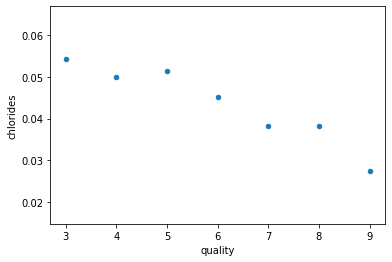

In [138]:
test.head()
test.plot(kind='scatter', x = 'quality', y = 'chlorides')

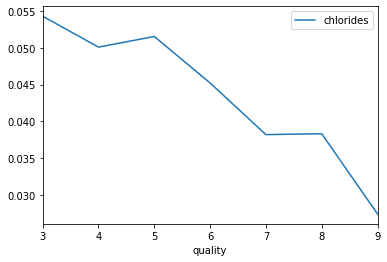

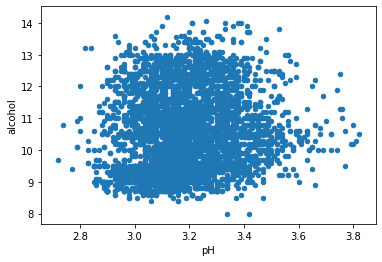

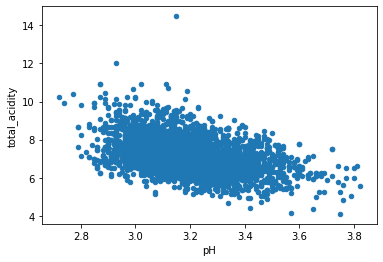

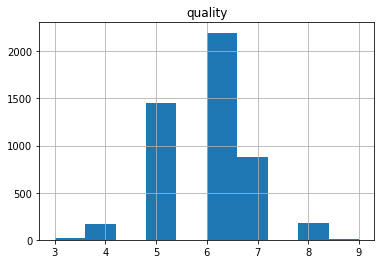

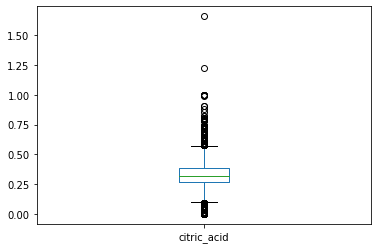

In [160]:


import matplotlib.pyplot as plt
groupbyquality = dfw.groupby('quality')
#print(groupbyquality['chlorides'].mean())

groupbypH = dfwpHs.query('4.0 > pH > 3.0').groupby('pH')
test = pd.DataFrame(groupbyquality.mean()['chlorides'])
test.plot()
#type(test)
#t#est.columns = ['quality','chlorides']
dfw.plot(kind = 'scatter', x = 'pH', y = 'alcohol')
dfw.plot(kind = 'scatter', x = 'pH', y = 'total_acidity')
dfw.hist('quality')
dfw[['citric_acid']].plot(kind = 'box')
#plt.scatter(test[:,0],test[:,1])

### Part 5 - Putting it All Together 

Now that you've worked on all the basics with one data set, it's time to do it with a second! This time, though, you'll go through the process of downloading the data set yourself. You'll also go through the process of learning to ask questions of the data (i.e. you won't be given any questions). We'll point you to a number of different data sets, and let you go at it. In reality, this is often how data science works. There isn't a clear-cut set of instructions on what to do - you kind of just dive into the data and see what you find!

Your goal by the end of `Part 5` is to be able to tell a story with your data. Whether that means you query it and find something interesting, examine a number of different columns and their values, or plot a couple of different columns, it doesn't matter. You should aim to find at least one piece of interesting information in your data (and ideally even more than one). Then, tell your peers and the instructors what you've found! 

Potential data sources: 

1. [Forest-fires](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)
2. [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
3. [Another wine data set](http://archive.ics.uci.edu/ml/datasets/Wine)
4. [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone)
5. [Adult Income data set](http://archive.ics.uci.edu/ml/datasets/Adult)

The links above are all to the home pages of these data sources. At the top of these pages, you will find a link the the `Data Folder` where you can actually find the data. The majority of these data sets don't come in `.csv` format. While one of the datasets is available in `.csv` format, we encourage you to pick whatever data set you find most interesting (regardless of the format), and challenge yourself to read the necessary documentation and go through the process of figuring out how to get the data from the web and into a `DataFrame` (the instructors will also be around to help).

In [159]:
dfff = pd.read_csv('forestfires.csv')
dfff
#keymonths = {1 : 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',}

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### Citation Request:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

1. Title: Forest Fires

2. Sources
   Created by: Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007

3. Past Usage:

   P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
   In Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence,
   December, 2007. (http://www.dsi.uminho.pt/~pcortez/fires.pdf)

   In the above reference, the output "area" was first transformed with a ln(x+1) function.
   Then, several Data Mining methods were applied. After fitting the models, the outputs were
   post-processed with the inverse of the ln(x+1) transform. Four different input setups were
   used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
   regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
   with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
   12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
   best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
   (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
   the SVM model predicts better small fires, which are the majority.

4. Relevant Information:

   This is a very difficult regression task. It can be used to test regression methods. Also,
   it could be used to test outlier detection methods, since it is not clear how many outliers
   are there. Yet, the number of examples of fires with a large burned area is very small.

5. Number of Instances: 517

6. Number of Attributes: 12 + output attribute

   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec"
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3
   7. DC - DC index from the FWI system: 7.9 to 860.6
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40
   12. rain - outside rain in mm/m2 : 0.0 to 6.4
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

8. Missing Attribute Values: None


In [168]:
dfff.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [169]:
import numpy as np

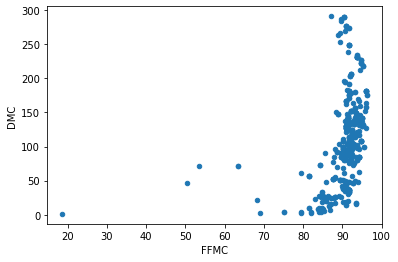

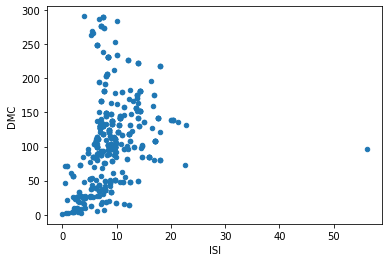

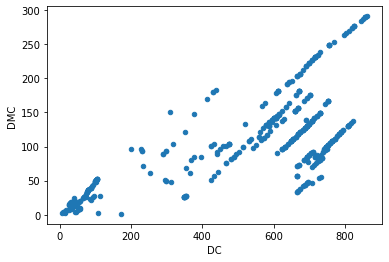

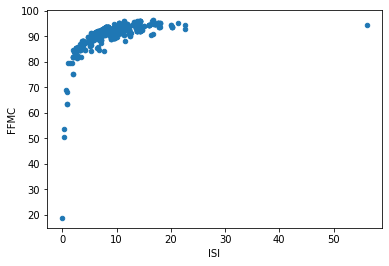

In [236]:
#dfff.plot(kind = 'scatter', x = 'temp', y = 'area')
#dfff.plot(kind = 'scatter', x = 'temp', y = 'rain')
#dfff.plot(kind = 'scatter', x = 'temp', y = 'wind')
#dfff.plot(kind = 'scatter', x = 'RH', y = 'temp')
dfff.plot(kind = 'scatter', x = 'FFMC', y = 'DMC')
dfff.plot(kind = 'scatter', x = 'ISI', y = 'DMC')
dfff.plot(kind = 'scatter', x = 'DC', y = 'DMC')
dfff.plot(kind = 'scatter', x = 'ISI', y = 'FFMC')
posmap = dfff[dfff['month'] == 'aug'].groupby(['X', 'Y'])['temp'].mean()
#posmap = dfff[dfff['month'] == 'aug'].groupby(['X', 'Y', 'temp'])['temp'].mean()
#posmap = dfff[dfff['month'] == 'aug'].groupby(['X', 'Y', 'temp'])['temp'].mean()
#print(posmap)

#areagroup = dfff.groupby('area')
#test = areagroup['temp'].max().tail()
#test.plot()

daytemp = dfff.query('temp > 20.0')
daytempr = daytemp.groupby('temp')
#daytempr.tail()
#pd.DataFrame(daytempr).hist('day')
#pd.DataFrame(daytempr).columns
#daytempr['FFMC'].plot()



#hdfreset = posmap.reset_index()
#hdfreset.columns = ['X', 'Y', 'temp']
#hdfpivot=hdfreset.pivot('X', 'Y')
#X=hdfpivot.columns.levels[1].values
#Y=hdfpivot.index.values
#Z=hdfpivot.values
#Xi,Yi = np.meshgrid(X, Y)
#plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet);
#dfffb = dfff[dfff['month'] == 'aug']
#dfffb

In [231]:
dfff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000
